# Support Vector Machines

### Try this one!   
[LIBSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvm/)


- Support vector machines (SVMs) represent the cutting edge of machine learning.
- They are most often used to solve classification problems, but they can also be used for regression.

Scikit-Learn makes building SVMs easy with classes such as `SVC` (short for support vector classifier) for classification models and `SVR` (support vector regressor) for regression models.

## How Support Vector Machines Work
- The purpose of an SVM classifier is the same as any other classifier: to find a decision boundary that cleanly separates the classes.
- SVMs do this by finding a line in 2D space, a plane in 3D space, or a hyperplane in higher-dimensional space that allows them to distinguish between different classes with the greatest certainty possible.

<div>
    <img src="images/large-margin.png" width=800/>
</div>

In the example in Figure above, there are an infinite number of lines you can draw to separate the two classes, but the best line is the one that produces the widest margin (the one shown on the right).

- The width of the margin is the distance between the points closest to the boundary in each class along a line perpendicular to the boundary.
- These points are called **support vectors** and are circled in red.

- Of course, real data rarely lends itself to such clean separation. 
- Overlap between classes inevitably prevents a perfect fit. 

- To accommodate this, SVMs support a regularization parameter usually referred to as C that can be adjusted to loosen or tighten the fit. 
- Lower values of C produce a wider margin with more errors on either side of the decision boundary, as shown in Figure below.

<div>
    <img src="images/effect-of-c.png" width=800/>
</div>

- Higher values yield a tighter fit to the training data with a correspondingly thinner margin and fewer errors. 
- If C is too high, the model might not generalize well. 
- The optimum value varies by dataset. 

- What makes SVMs special are kernels, some of which add dimensions to data to find boundaries that don’t exist at lower dimensions.
- You can’t draw a line that completely separates the red dots from the purple dots. 

But if you add a third dimension as shown on the right—a z dimension whose value is based on a point’s distance from the center—then you can slide a plane between the purples and the reds and achieve 100% separation.

<div>
    <img src="images/adding-dimension.png" width=800>
</div>

The principle at work is **Cover**’s theorem, which states that data that isn’t linearly separable _might_ be linearly separable if projected into higher-dimensional space using a nonlinear transform.

## Kernels
Scikit-Learn has several general-purpose kernels built in, including 
- the linear kernel,
- the RBF kernel, 
- the polynomial kernel, and 
- the sigmoid kernel.

- The linear kernel doesn’t add dimensions. 
- It works well with data that is linearly separable out of the box, but it doesn’t perform very well with data that isn’t.

<div>
    <img src="images/linear-kernel.png" width=800 />
</div>

## Kernel Tricks

<div>
    <img src="images/projecting-2D-to-3D.png" width=800>
</div>

- Kernel trick dari gambar sebelumnya digunakan untuk menghasilkan nilai di 3D tapi menggunakan nilai di _the original 2D space_ $\Rightarrow$ tanpa memerlukan proyeksi titik-titik di 2D ke 3D. 

- The kernel trick used here wasn't manufactured from thin air. 
- It happens to be the one used by a degree-2 polynomial kernel. 
- With Scikit, you can fit an SVM classifier with a degree-2 polynomial kernel to a dataset this way:

```
model = SVC(kernel='poly', degree=2)
model.fit(x, y)
```

<div>
    <img src="images/polynomial-kernel.png" width=800>
</div>

## Pertanyaan Refleksi
- Apakah yang dapat disimpulkan dari nilai `C`?
- Apakah kegunaan dari _kernel trick_?

## Hyperparameter Tuning
- the **built-in kernels** will produce the most accurate model
- the right value of `C` (the best balance between underfitting and overfitting)
- For the RBF and polynomial kernels, there’s a third value called `gamma` that affects accuracy.
- for polynomial kernels, the `degree` parameter impacts the model’s ability to learn from the training data.

- The `C` parameter controls how aggressively the model fits to the training data.
- The higher the value, the tighter the fit and the higher the risk of overfitting.


<div>
    <img src="images/effect-c-rbf.png" width=800>
</div>

- You can see the danger of overfitting in the lower-right diagram.   
- Underfitting is a problem too. 
- In the upper-left example, virtually any data point that isn’t a brown will be classified as a blue.

- An SVM that uses the RBF kernel isn’t properly tuned until you have the right value for `gamma` too. 
- `gamma` controls how far the influence of a single data point reaches in computing decision boundaries. 

- Lower values use more points and produce smoother decision boundaries; higher values involve fewer points and fit more tightly to the training data.

<div>
    <img src="images/effect-gamma-rbf.png" width=800 />
</div>

- This is illustrated in Figure above, where increasing `gamma` while holding `C` constant closes the decision boundary more tightly around clusters of classes. 
- `gamma` can be any nonzero positive value, but values between `0` and `1` are the most common. 
- Rather than hardcode a default value for gamma , Scikit picks a default value algorithmically if you don’t specify one.

- In practice, data scientists experiment with different kernels and different parameter values to find the combination that produces the most accurate model, a process known as _**hyperparameter tuning**_.

## Using SVMs for Facial Recognition

# Facial recognition with Support Vector Machines (SVMs)

[Support vector machines](https://en.wikipedia.org/wiki/Support-vector_machine), or SVMs, often do better than other models at fitting data — especially data is that is highly non-linear. The diagram on the left below shows a set of data points that a conventional linear model will not fit. In other words, there is no line you can draw to separate the blue points from the green points. However, you can add a third dimension to each data point based on its distance from the center. In 3D space (below right), you can then draw a plane that cleanly separates the two classes. This is the essence of how SVMs work, although when they add dimensions to your data, they typically add more than one. In some cases, they add an infinite number of dimensions! And they use *kernel tricks* to  do the math without actually computing values for all those new dimensions.

![](images/svm.png)

That's a simple way to visualize how support vector machines work. Let's learn about SVM by using the [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/) (LFW) dataset provided with Scikit-learn to build a facial-recognition model.

## Load the dataset

The first step is to import facial images from the dataset. LFW contains more than 13,000 facial images collected from the Web. Of the more than 5,000 people represented in the dataset, 1,680 have two or more facial images, while only five have 100 or more. We'll set the minimum number of faces per person to 100, which means that five sets of faces corresponding to five famous people will be imported. Each facial image is labeled with the name of the person to whom the face belongs.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=100, slice_=None)
faces.images = faces.images[:, 35:97, 39:86]
faces.data = faces.images.reshape(faces.images.shape[0], faces.images.shape[1] * faces.images.shape[2])
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


In [2]:
faces.images.shape

(1140, 62, 47)

In [3]:
faces.target_names

array(['Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

In [4]:
faces.target

array([2, 3, 1, ..., 4, 2, 4])

In total, 1,140 facial images were loaded. After cropping, each image measures 47 x 62 pixels for a total of 2,914 pixels per image. That means we're working with a dataset containing 2,914 feature columns. Use the following code to show the first 24 images in the dataset and the people to whom the faces belong.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

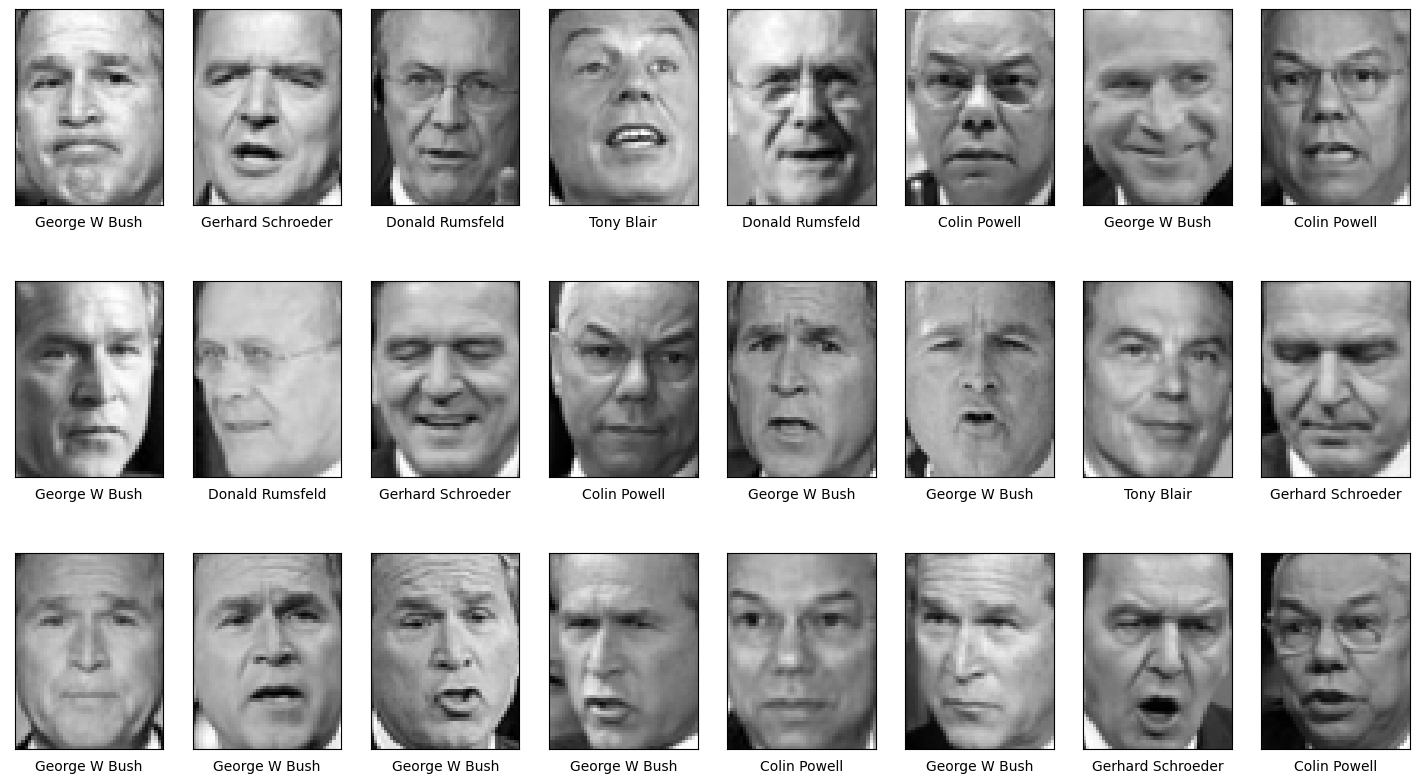

In [6]:
fig, ax = plt.subplots(3, 8, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

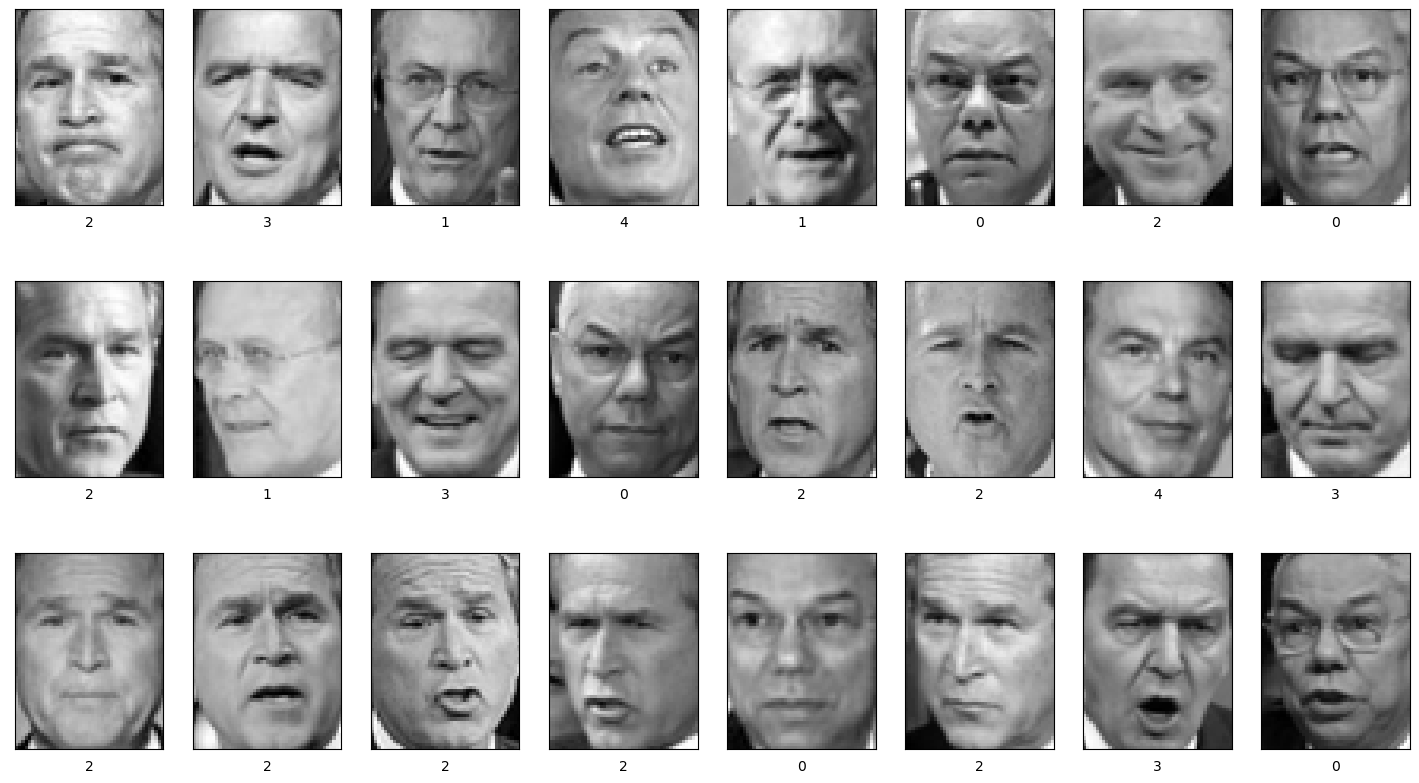

In [7]:
fig, ax = plt.subplots(3, 8, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target[i])

Check the balance in the dataset by generating a histogram showing how many facial images were imported for each person.

<AxesSubplot: >

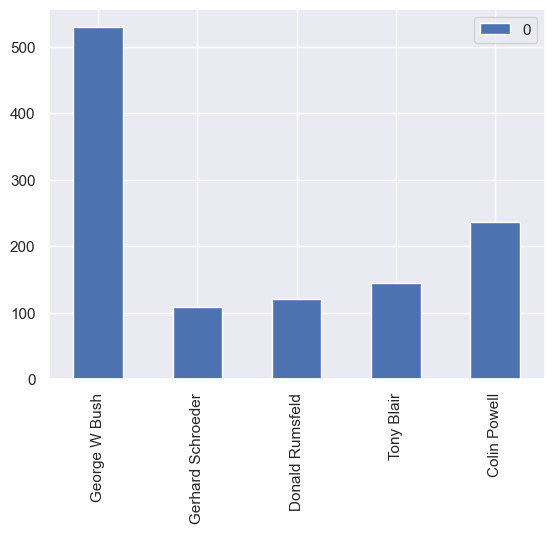

In [9]:
import seaborn as sns
sns.set()

from collections import Counter
counts = Counter(faces.target)
names = {}

for key in counts.keys():
    names[faces.target_names[key]] = counts[key]

df = pd.DataFrame.from_dict(names, orient='index')
df.plot(kind='bar')

There are far more images of George W. Bush than of anyone else in the dataset. Classification models are best trained with balanced datasets. Use the following code to reduce the dataset to 100 images of each person.

In [10]:
mask = np.zeros(faces.target.shape, dtype=bool)

for target in np.unique(faces.target):
    mask[np.where(faces.target == target)[0][:100]] = 1
    
x = faces.data[mask]
y = faces.target[mask]
x.shape

(500, 2914)

`x` contains 500 facial images, and `y` contains the labels that go with them: 0 for Colin Powell, 1 for Donald Rumsfeld, and so on. Now let's see if an SVM can make sense of the data.

## Use an SVM to classify facial images

The next task is to train an SVM model to do image classification using the faces in the dataset. We'll train three different models: one that uses a linear kernel, one that uses a polynomial kernel, and one that uses an RBF kernel. In each case, we'll use [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to optimize hyperparameters. Start with a linear model.

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel='linear')

grid = {
    'C': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=svc, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x, y) # Train the model with different parameters
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.1s
[CV] END ...............................................C=10; total time=   0.1s
[CV] END ........................................

0.842

This model achieved a cross-validated accuracy of 84.2%. It's possible that accuracy can be improved by standardizing the image data. Run the same grid search again, but this time use [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to apply unit variance to all the pixel values.

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
svc = SVC(kernel='linear')
pipe = make_pipeline(scaler, svc)

grid = {
    'svc__C': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x, y)
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................................svc__C=0.1; total time=   0.2s
[CV] END .........................................svc__C=0.1; total time=   0.2s
[CV] END .........................................svc__C=0.1; total time=   0.2s
[CV] END .........................................svc__C=0.1; total time=   0.2s
[CV] END .........................................svc__C=0.1; total time=   0.1s
[CV] END ...........................................svc__C=1; total time=   0.1s
[CV] END ...........................................svc__C=1; total time=   0.1s
[CV] END ...........................................svc__C=1; total time=   0.2s
[CV] END ...........................................svc__C=1; total time=   0.2s
[CV] END ...........................................svc__C=1; total time=   0.1s
[CV] END ..........................................svc__C=10; total time=   0.1s
[CV] END ........................................

0.8560000000000001

Standardizing the data produced an incremental improvement in accuracy. What value of `C` produced that accuracy?

In [13]:
grid_search.best_params_

{'svc__C': 0.1}

Is it possible that a polynomial kernel could outperform a linear kernel? There's an easy way to find out. Note the introduction of the `gamma` and `degree` parameters to the parameter grid. These parameters, along with `C`, can greatly influence a polynomial kernel's ability to fit to the training data.

In [14]:
scaler = StandardScaler()
svc = SVC(kernel='poly')
pipe = make_pipeline(scaler, svc)

grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.01, 0.25, 0.5, 0.75, 1],
    'svc__degree': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x, y)
grid_search.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.1s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.1s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.1s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.1s
[CV] END ..........svc__C=0.1, svc__degree=1, svc__gamma=0.5; total time=   0.1s
[CV] END ..........svc__C=0.1, svc__degree=1, 

[CV] END .........svc__C=0.1, svc__degree=5, svc__gamma=0.01; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=5, svc__gamma=0.01; total time=   0.3s
[CV] END .........svc__C=0.1, svc__degree=5, svc__gamma=0.01; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=5, svc__gamma=0.01; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=5, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=5, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=5, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=5, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=5, svc__gamma=0.25; total time=   0.2s
[CV] END ..........svc__C=0.1, svc__degree=5, svc__gamma=0.5; total time=   0.2s
[CV] END ..........svc__C=0.1, svc__degree=5, svc__gamma=0.5; total time=   0.2s
[CV] END ..........svc__C=0.1, svc__degree=5, svc__gamma=0.5; total time=   0.2s
[CV] END ..........svc__C=0.

[CV] END ...........svc__C=1, svc__degree=4, svc__gamma=0.01; total time=   0.2s
[CV] END ...........svc__C=1, svc__degree=4, svc__gamma=0.01; total time=   0.2s
[CV] END ...........svc__C=1, svc__degree=4, svc__gamma=0.25; total time=   0.2s
[CV] END ...........svc__C=1, svc__degree=4, svc__gamma=0.25; total time=   0.2s
[CV] END ...........svc__C=1, svc__degree=4, svc__gamma=0.25; total time=   0.2s
[CV] END ...........svc__C=1, svc__degree=4, svc__gamma=0.25; total time=   0.2s
[CV] END ...........svc__C=1, svc__degree=4, svc__gamma=0.25; total time=   0.2s
[CV] END ............svc__C=1, svc__degree=4, svc__gamma=0.5; total time=   0.2s
[CV] END ............svc__C=1, svc__degree=4, svc__gamma=0.5; total time=   0.2s
[CV] END ............svc__C=1, svc__degree=4, svc__gamma=0.5; total time=   0.2s
[CV] END ............svc__C=1, svc__degree=4, svc__gamma=0.5; total time=   0.2s
[CV] END ............svc__C=1, svc__degree=4, svc__gamma=0.5; total time=   0.2s
[CV] END ...........svc__C=1

[CV] END ..........svc__C=10, svc__degree=3, svc__gamma=0.25; total time=   0.2s
[CV] END ..........svc__C=10, svc__degree=3, svc__gamma=0.25; total time=   0.2s
[CV] END ..........svc__C=10, svc__degree=3, svc__gamma=0.25; total time=   0.2s
[CV] END ..........svc__C=10, svc__degree=3, svc__gamma=0.25; total time=   0.2s
[CV] END ..........svc__C=10, svc__degree=3, svc__gamma=0.25; total time=   0.2s
[CV] END ...........svc__C=10, svc__degree=3, svc__gamma=0.5; total time=   0.2s
[CV] END ...........svc__C=10, svc__degree=3, svc__gamma=0.5; total time=   0.2s
[CV] END ...........svc__C=10, svc__degree=3, svc__gamma=0.5; total time=   0.2s
[CV] END ...........svc__C=10, svc__degree=3, svc__gamma=0.5; total time=   0.2s
[CV] END ...........svc__C=10, svc__degree=3, svc__gamma=0.5; total time=   0.2s
[CV] END ..........svc__C=10, svc__degree=3, svc__gamma=0.75; total time=   0.2s
[CV] END ..........svc__C=10, svc__degree=3, svc__gamma=0.75; total time=   0.2s
[CV] END ..........svc__C=10

[CV] END .........svc__C=100, svc__degree=2, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=100, svc__degree=2, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=100, svc__degree=2, svc__gamma=0.25; total time=   0.2s
[CV] END ..........svc__C=100, svc__degree=2, svc__gamma=0.5; total time=   0.2s
[CV] END ..........svc__C=100, svc__degree=2, svc__gamma=0.5; total time=   0.2s
[CV] END ..........svc__C=100, svc__degree=2, svc__gamma=0.5; total time=   0.2s
[CV] END ..........svc__C=100, svc__degree=2, svc__gamma=0.5; total time=   0.2s
[CV] END ..........svc__C=100, svc__degree=2, svc__gamma=0.5; total time=   0.2s
[CV] END .........svc__C=100, svc__degree=2, svc__gamma=0.75; total time=   0.2s
[CV] END .........svc__C=100, svc__degree=2, svc__gamma=0.75; total time=   0.2s
[CV] END .........svc__C=100, svc__degree=2, svc__gamma=0.75; total time=   0.2s
[CV] END .........svc__C=100, svc__degree=2, svc__gamma=0.75; total time=   0.2s
[CV] END .........svc__C=100

0.8560000000000001

The polynomial kernel achieved the same accuracy as the linear kernel. What parameter values led to this result?

In [15]:
grid_search.best_params_

{'svc__C': 0.1, 'svc__degree': 1, 'svc__gamma': 0.25}

`best_params_` reveals that the optimum value of `degree` was 1, which means the polynomial kernel acted like a linear kernel. It's not surprising, then, that it achieved the same accuracy. Could an RBF kernel do better?

In [16]:
scaler = StandardScaler()
svc = SVC(kernel='rbf')
pipe = make_pipeline(scaler, svc)

grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.01, 0.25, 0.5, 0.75, 1.0]
}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x, y)
grid_search.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.2s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.2s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.2s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.2s
[CV] END .........................svc__C=0.1, svc__gamma=0.5; total time=   0.2s
[CV] END .........................svc__C=0.1, s

0.472

The RBF kernel didn't perform as well as the linear and polynomial kernels. There's a lesson here. The RBF kernel *often* fits to non-linear data better than other kernels, but it doesn't *always* fit better. That's why the best strategy with an SVM is to try different kernels with different parameter values. The best combination will vary from dataset to dataset. For the LFW dataset, it seems that a linear kernel is best. That's convenient, because the linear kernel is the fastest of all the kernels that Scikit provides.

## Visualize the model's performance

Confusion matrices are a great way to visual a model's accuracy. Let's split the dataset, train an optimized linear model with 80% of the images, test it with the remaining 20%, and show the results in a confusion matrix. The first step is to split the dataset. Note the `stratify=y` parameter, which ensures that the training dataset and the test dataset have the same proportion of samples of each class as the original dataset. In this example, the training dataset will contain 20 samples of each of the five people.

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=0)

Now train a linear SVM with the optimum `C` value revealed by the grid search.

In [18]:
scaler = StandardScaler()
svc = SVC(kernel='linear', C=0.1)
pipe = make_pipeline(scaler, svc)
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear'))])

Use a confusion matrix to see how the model performs against the test data.

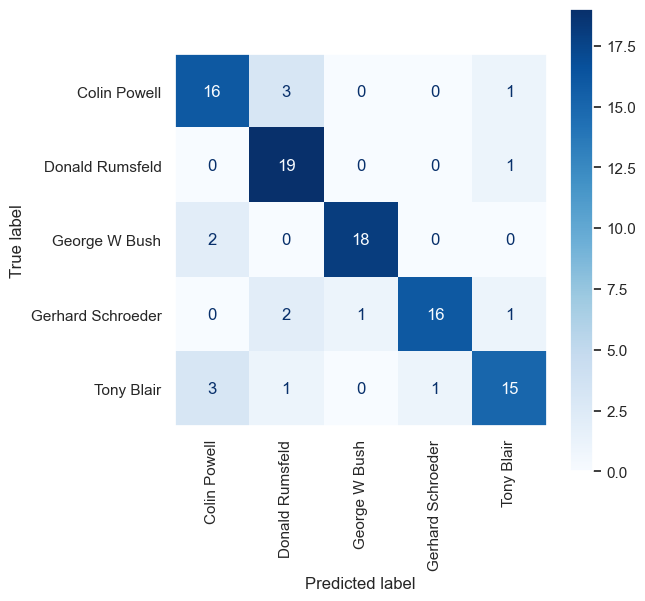

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(False)
cmd.from_estimator(pipe, x_test, y_test, display_labels=faces.target_names, 
                   cmap='Blues', xticks_rotation='vertical', ax=ax)

The model correctly identified Colin Powell 16 times out of 20, Donald Rumsfeld 19 times out of 20, and so on. That's not bad. And it's a great example of support vector machines at work. It would be challenging, perhaps impossible, to do this well using more conventional learning algorithms such as logistic regression.

<center>
    <h1>The End</h1>
</center>    